In [57]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
data=pd.read_csv('SMSSpamCollection',sep='\t',header=None,names=['label','message'])

In [59]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [60]:
data.dtypes

label      object
message    object
dtype: object

In [61]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [62]:
vectorizer=CountVectorizer(stop_words='english')

In [63]:
X=vectorizer.fit_transform(data['message'])

In [64]:
data['label']=data['label'].map({'spam':0,'ham':1})
y=data['label']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: int64

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [66]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [67]:
y_predict=model.predict(X_test)

In [68]:
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [69]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9806173725771715

In [70]:
conf=confusion_matrix(y_test,y_predict)

In [71]:
conf

array([[ 177,    9],
       [  18, 1189]])

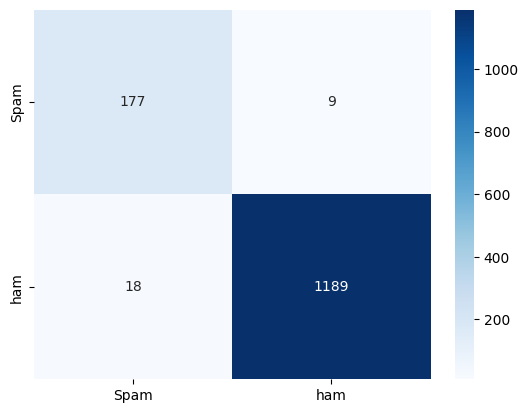

In [74]:
sns.heatmap(conf,annot=True,fmt='d',cmap='Blues',xticklabels=['Spam','ham'],yticklabels=['Spam','ham'])
 
plt.show()

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       186
           1       0.99      0.99      0.99      1207

    accuracy                           0.98      1393
   macro avg       0.95      0.97      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [76]:
def classify_sms(input_sms):
    input_data=[input_sms]
    input_vector=vectorizer.transform(input_data)
    prediction=model.predict(input_vector)
    if prediction==0:
        return'Spam'
    else:
        return'ham'

In [77]:
input_sms=input('Enter sms')
print(classify_sms(input_sms))

Enter sms Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..


ham
